<img src="https://upload.wikimedia.org/wikipedia/commons/8/89/TheNorthFace_logo.svg" alt="THE NORTH FACE LOGO" width="50%" />

# The North Face e-commerce : boosting online sales !

## Company's Description 📇

The North Face is an American outdoor recreation product company, founded in 1968 to supply climbers. The North Face produces clothing, footwear, and outdoor equipment. By the late 1990s customers had expanded beyond outdoor enthusiasts and in the 2000s it became a fashion style symbol.


## Project 🚧

The marketing department would like to take advantage of machine learning solutions to boost online sales on the website : https://www.thenorthface.fr/

They have identified two major solutions that could have a huge effect on the conversion rates :
- Deploying a **recommender system** that will allow to suggest additionnal products to users, that are similar to the items they are already interested in. The recommendations could be materialized by a "you might also be interested by these products..." section that would appear on each product page of the website.
- Improving the structure of the products catalog thanks to **topic extraction**. The idea is to use unsupervised methods to challenge the existing categories : is it possible to find new categories of product that would be more suitable for the navigation on the website ?

## Goals 🎯

The project can be cut into three steps :

1. Identify groups of products that have similar descriptions.

2. Use the groups of similar products to build a simple recommender system algorithm.

3. Use topic modeling algorithms to automatically assess the latent topics present in the item descriptions.

## Scope of this project 🖼️

In this project, you'll work with a corpus of item descriptions from The North Face's product catalog. Data can be found here: 

👉👉<a href="https://www.kaggle.com/cclark/product-item-data?select=sample-data.csv" target="_blank"> The North Face product catalog</a> 👈👈


## Deliverable 📬

To complete this project, your team should: 

- Train at least one **clustering model** on the corpus and display wordclouds describing the clusters
- Develop a simple python code that allows a user to type the id of a product he's interested in, and then get a list of similar items
- Train at least one **TruncatedSVD model** on the corpus and display wordclouds describing the latent topics



### --------------------------------------------------------------------------------------------------------------------------------------------------------




### Preprocessing of textual data

- First, you'll have to make some preprocessings to clean the corpus (in particular, don't forget to handle stop words and to lemmatize the documents). For this step, you'll need `pandas` and `spacy`.

- Then, you can to encode the texts with **TF-IDF transformation** (this can be done with scikit learn's `TFIDFVectorizer`)



In [2]:
# Module installation 

!pip install spacy -q

In [3]:
# Module standard Import 

import pandas as pd 
import numpy as np 
import spacy 

In [9]:
dataset = pd.read_csv('north_face.csv')

display(dataset.head())
display(dataset.shape)

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


(500, 2)

In [10]:
#Read a description 

print(dataset.loc[0, "description"])

Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><br>

In [11]:
#Load english model from spacy

!python -m spacy download en -q

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [12]:
#Cleaning the corpus : case

dataset['description_cleaned'] = dataset['description'].str.lower()
print(dataset.loc[0, "description_cleaned"])

active classic boxers - there's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. the quick-drying, lightweight underwear takes up minimal space in a travel pack. an exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. made of 3.7-oz 100% recycled polyester with moisture-wicking performance. inseam (size m) is 4 1/2". recyclable through the common threads recycling program.<br><br><b>details:</b><ul> <li>"silky capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"inseam (size m) is 4 1/2"""</li></ul><br><br><b>fabric: </b>3.7-oz 100% all-recycled polyester with gladiodor natural odor control for the garment. recyclable through the common threads recycling program<br><br><b>weight: </b>99 g (3.5 oz)<br><br>

In [13]:
#Cleaning the corpus : Delete a HTML element 

dataset['description_cleaned'] = dataset['description_cleaned'].str.replace(r"<[a-z/]+>", " ") 
print(dataset.loc[0, "description_cleaned"])

active classic boxers - there's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. the quick-drying, lightweight underwear takes up minimal space in a travel pack. an exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. made of 3.7-oz 100% recycled polyester with moisture-wicking performance. inseam (size m) is 4 1/2". recyclable through the common threads recycling program.   details:    "silky capilene 1 fabric is ultralight, breathable and quick-to-dry"   "exposed, brushed elastic waistband for comfort"   5-panel construction with traditional boxer back   "inseam (size m) is 4 1/2"""     fabric:  3.7-oz 100% all-recycled polyester with gladiodor natural odor control for the garment. recyclable through the common threads recycling program   weight:  99 g (3.5 oz)  made in mexico.


In [17]:
#Cleaning the corpus : Delete a special characters and numbers

dataset['description_cleaned'] = dataset['description_cleaned'].str.replace(r"[^A-Za-z]+", " ")
print(dataset.loc[0, "description_cleaned"])

active classic boxers there s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations the quick drying lightweight underwear takes up minimal space in a travel pack an exposed brushed waistband offers next to skin softness five panel construction with a traditional boxer back for a classic fit and a functional fly made of oz recycled polyester with moisture wicking performance inseam size m is recyclable through the common threads recycling program details silky capilene fabric is ultralight breathable and quick to dry exposed brushed elastic waistband for comfort panel construction with traditional boxer back inseam size m is fabric oz all recycled polyester with gladiodor natural odor control for the garment recyclable through the common threads recycling program weight g oz made in mexico 


In [18]:
#Tokenization & Lemmatization

import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.lang.en.stop_words import STOP_WORDS 

# tokenization
dataset["Token_description"] = dataset['description_cleaned'].fillna('').apply(lambda x: nlp(x))

# remove stop-words
dataset["Token_description"] = dataset["Token_description"].apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])

dataset.head()

,id,description,description_cleaned,Token_description,De-token_description
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...


In [19]:
#Add a column with the description de-tokenized

detokenized_doc = []
for i in range(len(dataset)):
    t = ' '.join(dataset["Token_description"][i])
    detokenized_doc.append(t)

dataset['De-token_description'] = detokenized_doc
dataset.head()

,id,description,description_cleaned,Token_description,De-token_description
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...


### Part 1 : Groups of products with similar descriptions

For this part, you'll have to train a **clustering model** that will create groups of products for which the descriptions are "close" to each other. 
- You can use `DBSCAN` to make some clustering on the TF-IDF matrix. When dealing with texts, the distance metric to be used is "cosine" instead of "euclidean". You have to find some values for `eps` and `min_samples` that allow to get 10-20 clusters and not too many outliers.
- You can display a `wordcloud` for each cluster to analyze the results and see if the groups contain different words.

In [20]:
# TF-IDF 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
X = vectorizer.fit_transform(dataset["De-token_description"])
dense = X.toarray()
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
vectorizer.vocabulary_


{'active': 24,
 'classic': 503,
 'boxer': 329,
 'reason': 2381,
 'cult': 716,
 'favorite': 1086,
 'cool': 639,
 'especially': 1015,
 'sticky': 2892,
 'situation': 2719,
 'quick': 2342,
 'dry': 902,
 'lightweight': 1711,
 'underwear': 3274,
 'minimal': 1885,
 'space': 2816,
 'travel': 3191,
 'pack': 2095,
 'expose': 1047,
 'brush': 359,
 'waistband': 3388,
 'offer': 2032,
 'skin': 2730,
 'softness': 2797,
 'panel': 2113,
 'construction': 616,
 'traditional': 3174,
 'fit': 1131,
 'functional': 1236,
 'fly': 1175,
 'oz': 2092,
 'recycle': 2390,
 'polyester': 2240,
 'moisture': 1909,
 'wicke': 3462,
 'performance': 2168,
 'inseam': 1543,
 'size': 2720,
 'recyclable': 2389,
 'common': 572,
 'thread': 3110,
 'program': 2295,
 'silky': 2698,
 'capilene': 414,
 'fabric': 1064,
 'ultralight': 3254,
 'breathable': 337,
 'brushed': 360,
 'elastic': 949,
 'comfort': 563,
 'gladiodor': 1279,
 'natural': 1959,
 'odor': 2031,
 'control': 629,
 'garment': 1252,
 'weight': 3439,
 'mexico': 1855,
 'spor

In [22]:
#Creation clustering with DBSCAN - First try

from sklearn.cluster import DBSCAN

cluster_dataset = DBSCAN(eps=0.2, min_samples=3, metric="euclidean", algorithm="brute")
cluster_dataset.fit(dense)

dataset['cluster_id'] = cluster_dataset.labels_
display(dataset.head())
display(dataset["cluster_id"].unique())

,id,description,description_cleaned,Token_description,De-token_description,cluster_id
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...,-1
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,-1
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,-1
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,-1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,-1


array([-1,  0,  1,  2,  3,  6,  4,  5], dtype=int64)

In [23]:
#Creation clustering with DBSCAN - Second try

cluster_dataset = DBSCAN(eps=0.4, min_samples=3, metric="euclidean", algorithm="brute")
cluster_dataset.fit(dense)

dataset['cluster_id'] = cluster_dataset.labels_
display(dataset.head())
display(dataset["cluster_id"].unique())

,id,description,description_cleaned,Token_description,De-token_description,cluster_id
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...,-1
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,-1
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,-1
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,-1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,-1


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [24]:
#Creation clustering with DBSCAN - Third try

cluster_dataset = DBSCAN(eps=0.7, min_samples=3, metric="euclidean", algorithm="brute")
cluster_dataset.fit(dense)

dataset['cluster_id'] = cluster_dataset.labels_
display(dataset.head())
display(dataset["cluster_id"].unique())

,id,description,description_cleaned,Token_description,De-token_description,cluster_id
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...,-1
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,-1
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,-1
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,-1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,-1


array([-1,  0,  1, 14,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [25]:
#Consult result with ID (1)

for d in dataset.loc[dataset['cluster_id']==1,:].sample(3)['description']:
    print(d)
    print()

Cap 2 t-shirt - This one revels in the sweat jamborees of hill climbs, ridge runs and desert singletrack under a resolute sun. Made from the fastest-drying of our performance baselayer fabrics, it has an open knit that invites airflow and provides excellent wicking and exceptional breathability. When worn beneath layers, it's also insulative enough for chilly days. The self-binding neck is pliable and soft; raglan sleeves and flat-ribbed underarm panels merge out of the way of straps to eliminate chafe. Made of 4-oz 100% polyester (54% recycled) with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Capilene 2 fabric has an open knit that invites airflow and provides excellent wicking for endurance activities in warm to moderate temperatures</li> <li>"Fastest-drying of our Capilene fabrics, it insulates enough for use on chilly days and can be worn beneath other layers"</li> <li>Self-fabric neckline s

In [26]:
#Consult result with ID (2)

for d in dataset.loc[dataset['cluster_id']==2,:].sample(3)['description']:
    print(d)
    print()

Compound cargo pants - short - The ultimate do-everything pants, built to withstand daily abuse. With cargo pockets modeled after vintage army blocks, our Compound Cargos are perfect for hitting the trail with a stash of climbing shoes, multitools, spare fins, wax, dry salami and the odd can of beer. Additional pocketing includes two generous front drop-in and two rear with hidden button-flap closures. Made from tough 5.5-oz organic cotton ripstop that has the tear strength of standard 8-oz material, they're hardy but lightweight and ready for action. Inseams (size 32): short, 30"; regular, 32"; long, 34". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Lightweight yet durable organic cotton ripstop</li> <li>Features our new fit block</li> <li>Two generous wide-entry drop-in front pockets</li> <li>Two side-seam cargo pockets with hidden button flap</li> <li>Two rear pockets with hidden button flap</li> <li>"Inseam is 30"""</li></ul><br><br><b>Fab

In [27]:
#Consult result with ID (3)

for d in dataset.loc[dataset['cluster_id']==3,:].sample(3)['description']:
    print(d)
    print()

Custodian pants - reg - The graveyard shift has its advantages: quitting time = dawn patrol. Our Custodian Pants are defined by their strong work ethic. They're made from a tough but comfortable 5.2-oz organic cotton canvas, with a flat front, generous wide-entry front pockets, welted back pockets, and a zip fly with button closure. Inseams (size 32): short, 30"; regular, 32"; long, 34". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Lightweight organic cotton canvas</li> <li>Zip fly with button closure</li> <li>Flat front with offset side seams</li> <li>Generous wide-entry front pockets; welted back pockets</li> <li>"Inseam is 32"""</li></ul><br><br><b>Fabric: </b>5.2-oz 100% organic cotton canvas. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(441 g 15.3 oz)<br><br>Made in Thailand.

Custodian pants - short - The graveyard shift has its advantages: quitting time = dawn patrol. Our Custodian Pants are defined by 

In [30]:
!pip install wordcloud

CLUSTER  -1


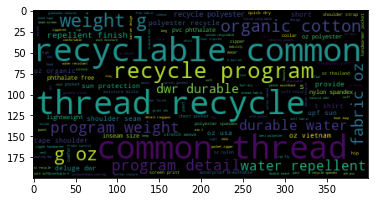

CLUSTER  8


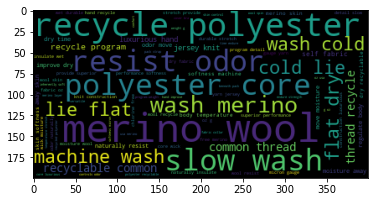

CLUSTER  12


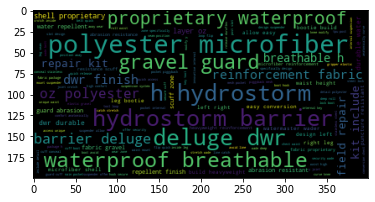

CLUSTER  9


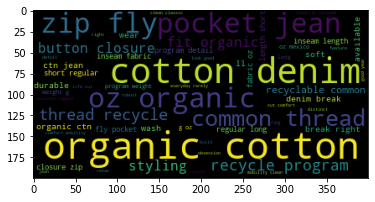

CLUSTER  5


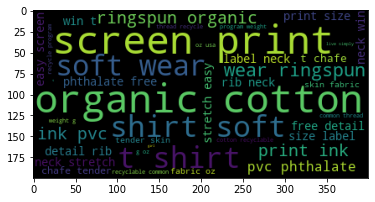

CLUSTER  1


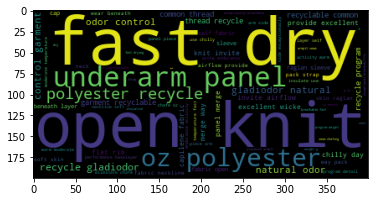

CLUSTER  10


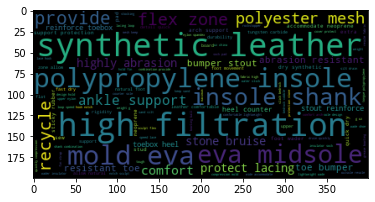

CLUSTER  2


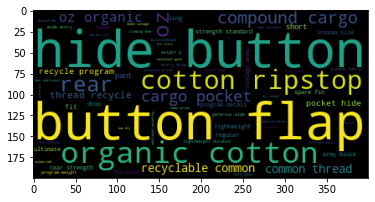

CLUSTER  14


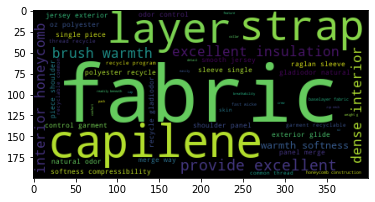

CLUSTER  13


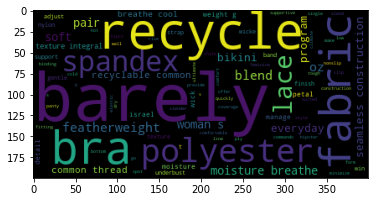

CLUSTER  11


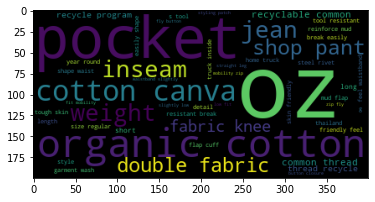

CLUSTER  7


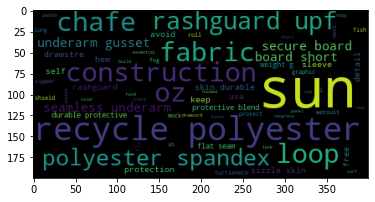

CLUSTER  6


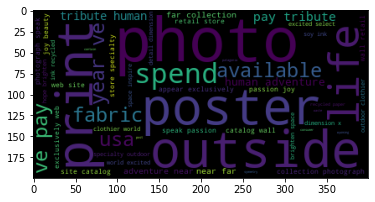

CLUSTER  4


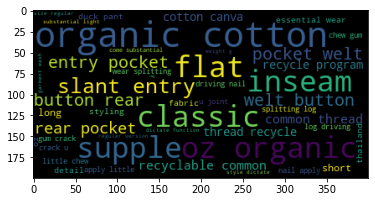

CLUSTER  3


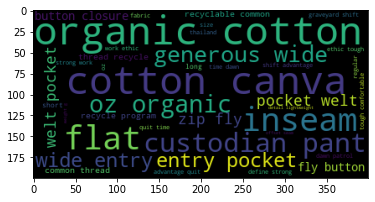

CLUSTER  0


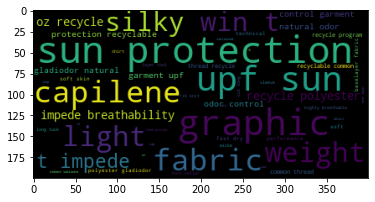

In [31]:
#Show the clusters with Word cloud

import matplotlib.pyplot as plt
import wordcloud

wd = wordcloud.WordCloud()

for c in dataset['cluster_id'].value_counts().index :
    print("CLUSTER ", c)
    texts = " ".join(dataset.loc[dataset['cluster_id']==c,'De-token_description'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()

### Part 2 - Recommender system

Then, you can use the cluster ids from part 1 to build a **recommender system**. The aim is to be able to suggest to a user some products that are similar to the ones he is interested in. To do this, we will consider that products belonging to the same cluster are similar.

- Create a function named `find_similar_items` that takes an argument `item_id` representing the id of a product, and that returns a list of 5 item ids that belong to the same cluster as the product passed in argument
- Use python's `input()` function to allow the user to choose a product and perform some suggestions of similar items

In [32]:
def find_similar_items(item_id):
    cluster_id = dataset.loc[dataset['id']==item_id, 'cluster_id'].values[0]
    similar_items = dataset.loc[dataset['cluster_id']==cluster_id,:].sample(5)
    similar_item_ids = similar_items.sample(5)['id'].unique()
    return similar_item_ids

In [ ]:
product_id = int(input("Select a recommandation from cluster algorithm :"))
print()
try:
    item_desc = dataset.loc[dataset['id']==product_id, 'description'].values[0]
except:
    print('Product not found in database. Please enter a valid product id.')
else:
    print("We suggest these products : ")

    for i in find_similar_items(product_id):
        print(f"Item number {i}")
        print(dataset.loc[dataset['id']==i, 'description'].values[0])
        print('--------------------')

### Part 3 : Topic modeling

*This part is independant from the two others.*

The aim is to use an LSA model to automatically extract latent topics in the products' descriptions.

- Use TruncatedSVD to make some topic extraction from the TF-IDF matrix. You can try values for `n_components` that allow to get 10-20 topics. Save the encoded matrix into a variable named `topic_encoded_df`.
- Contrary to clustering, LSA allows to map each document to a mixing of several topics. For this reason, it's a bit more difficult to interpret the topics as categories : one document can actually be related to several topics at a time. To make things easier, consider extracting the main topic of each document.
- As in part 1, you can display `wordclouds` to analyze the results.

In [ ]:
#Show the dataset

dataset.head(10)

In [ ]:
#Import module TruncatedSVD and convert terms in vector

from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=16, algorithm='randomized', n_iter=100, random_state=122)
lsa = svd_model.fit_transform(dense)

topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2","topic_3","topic_4","topic_5","topic_6","topic_7", "topic_8","topic_9", "topic_10","topic_11", "topic_12","topic_13", "topic_14","topic_15", "topic_16"])
topic_encoded_df["documents"] = dataset['description_cleaned']
topic_encoded_df.head()

In [ ]:
#Visualization a topic

import seaborn as sns

sns.scatterplot("topic_3","topic_4","topic_5",data= topic_encoded_df, hue = "documents")

In [ ]:
sns.scatterplot("topic_5","topic_6","topic_7",data= topic_encoded_df, hue = "documents")

In [ ]:
dic = vectorizer.vocabulary_
dic_sorted = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}
dic_sorted.keys()

sorted(dic.items(), key=lambda item: item[1])

In [ ]:
topic = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names(), index = ["topic_1", "topic_2","topic_3","topic_4","topic_5","topic_6","topic_7", "topic_8","topic_9", "topic_10","topic_11", "topic_12","topic_13", "topic_14","topic_15", "topic_16"])
topics_description = topic.apply(np.abs, axis = 1)

In [ ]:
topics_description.head()

In [ ]:
#Select 5 most important terms 

for i,row in topics_description.iterrows():
    print('TOPIC ', i)
    
    print(row.sort_values(ascending=False)[0:5].index.tolist())
    print()

In [ ]:
topics_description.head()

In [ ]:
def extract_main_topics(dense):
    topics = np.abs(dense)
    main_topic = topics.sort_values(ascending=False).index[0]
    return main_topic

# Initialize column `main_topics` with NANs
topic_encoded_df.loc[:, 'topic_id'] = np.nan

for i, row in topic_encoded_df.iloc[:,:-2].iterrows():
    topic_encoded_df.loc[i, 'topic_id'] = extract_main_topics(row)

topic_encoded_df.head()

In [ ]:
#Word cloud

wd = wordcloud.WordCloud()

cols = [c for c in topic_encoded_df.columns if 'topic_' in c]

for t in cols:
    print('-------------------------')
    print()
    print('TOPIC ', t)
    
    # Handle topics that are not main topics for any document in the corpus
    if (topic_encoded_df['topic_id']==t).any() == False :
        print('cannot create wordcloud for this topic')
        continue
    
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['topic_id']==t,'documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    
    print()